In [7]:
using CTDirect
using CTBase
using Plots


λ = 300
β =1e-07
μ = 0.05
d = 0.0002
a = 60
r = 0.15
rho = 400
K = 1000
nu = 0.045
b1 = 7800
b2 = 2
function ocp_T(T, b3)
    @def ocp begin
       t ∈ [ 0, T ], time
       x ∈ R³,  state 
       u ∈ R, control
       S = x₁
       I = x₂
       N = x₃
       ẋ(t) == [ λ-β*(1-u(t))*S(t)*N(t)-μ*S(t), 
                 β*(1-u(t))*S(t)*N(t)-μ*I(t)-d*N(t)*I(t)/(a+I(t)), 
                 (r+rho*d*I(t)/(a+I(t)))*N(t)*(1-N(t)/(K*I(t)))-nu*N(t) ] # please update! 
       S(0) == 100
       I(0) == 100
       N(0) == 1000
       0 ≤ u(t) ≤ 0.8
       b3*I(T) + ∫(b1*u(t) - b2*S(t) ) → min 
    end
    return ocp
end

ocp_T (generic function with 1 method)

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:     2404
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      606

Total number of variables............................:      505
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      101
                     variables with only upper bounds:        0
Total number of equality constraints.................:      404
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 1.00e+03 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

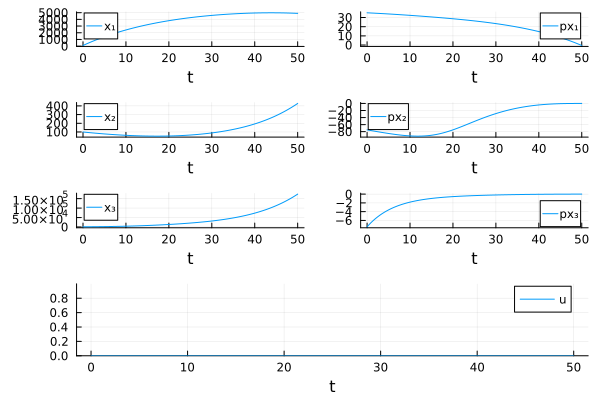

In [11]:
# Résolution initiale avec T=15
T_initial = 50
b3_initial = 0
ocp_initial = ocp_T(T_initial, b3_initial)
sol_initial = solve(ocp_initial)
plot(sol_initial)

In [12]:
T_new = 100
ocp_new = ocp_T(T_new, b3_initial)
init_new = OCPInit(sol_initial)

OCPInit(CTBase.var"#234#241"{OptimalControlSolution}(OptimalControlSolution
  times: Array{Float64}((101,)) [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5000000000000004, 4.0, 4.5  …  45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.0]
  initial_time_name: String "0"
  final_time_name: String "50"
  time_name: String "t"
  control_dimension: Int64 1
  control_components_names: Array{String}((1,))
  control_name: String "u"
  control: #6 (function of type CTDirect.var"#6#22"{Interpolations.Extrapolation{Vector{Float64}, 1, Interpolations.GriddedInterpolation{Vector{Float64}, 1, Vector{Vector{Float64}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Vector{Float64}}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Line{Nothing}}})
  state_dimension: Int64 3
  state_components_names: Array{String}((3,))
  state_name: String "x"
  state: #3 (function of type CTDirect.var"#3#19"{I

In [105]:
sol_new = solve(ocp_new, grid_size = 1000, max_iter = 2000, tol = 10e-20, print_level=5, mu_strategy="adaptive", init=init_new)

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    24004
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     6006

Total number of variables............................:     5005
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1001
                     variables with only upper bounds:        0
Total number of equality constraints.................:     4004
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 6.01e+03 9.90e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

OptimalControlSolution

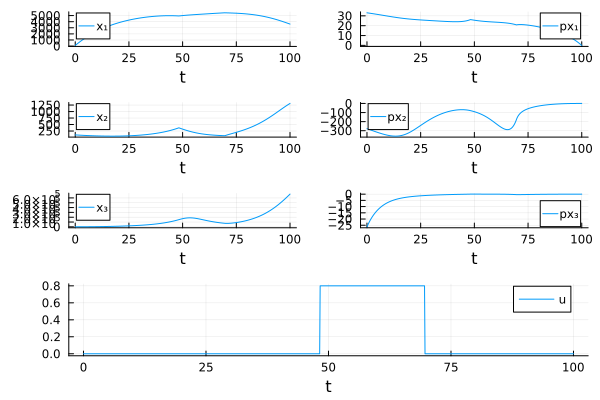

In [106]:
plot(sol_new)

In [107]:
T_new2 = 200
ocp_new2 = ocp_T(T_new2, b3_initial)
init_new2 = OCPInit(sol_new)
sol_new2 = solve(ocp_new2, grid_size = 1000, max_iter = 2000, tol = 10e-20, print_level=5, mu_strategy="adaptive", init=init_new2)

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    24004
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     6006

Total number of variables............................:     5005
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1001
                     variables with only upper bounds:        0
Total number of equality constraints.................:     4004
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 8.36e+03 1.50e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

OptimalControlSolution

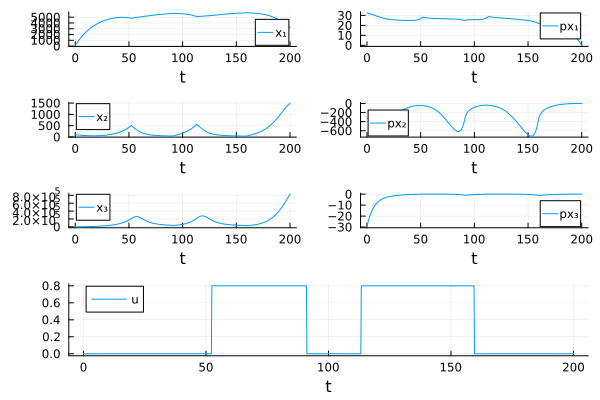

In [108]:
plot(sol_new2)

In [109]:
T_new3 = 300
ocp_new3 = ocp_T(T_new3, b3_initial)
init_new3 = OCPInit(sol_new2)
sol_new3 = solve(ocp_new3, grid_size = 1000, max_iter = 2000, tol = 10e-20, print_level=5, mu_strategy="adaptive", init=init_new3)

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    24004
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     6006

Total number of variables............................:     5005
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1001
                     variables with only upper bounds:        0
Total number of equality constraints.................:     4004
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 1.15e+05 6.17e-02   0.0 0.00e+00    -  0.00e+00 0.00e+00 

OptimalControlSolution

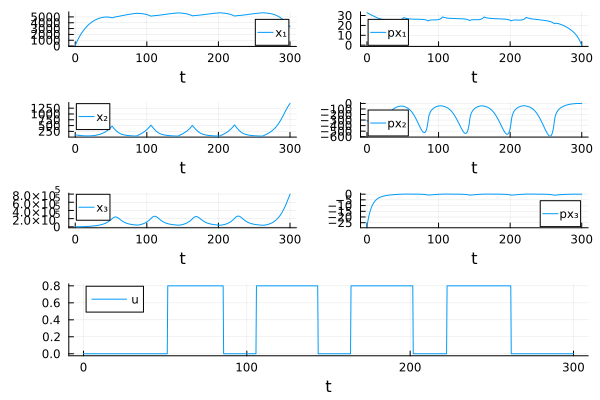

In [110]:
plot(sol_new3)

In [113]:
T_new4 = 300
b3_new4 = 180
ocp_new4 = ocp_T(T_new4, b3_new4)
init_new4 = OCPInit(sol_new3)
sol_new4 = solve(ocp_new4, grid_size = 1000, max_iter = 2000, tol = 10e-20, print_level=5, mu_strategy="adaptive", init=init_new4)

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    24004
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     6006

Total number of variables............................:     5005
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1001
                     variables with only upper bounds:        0
Total number of equality constraints.................:     4004
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.6176022e+05 3.41e+03 2.62e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

OptimalControlSolution

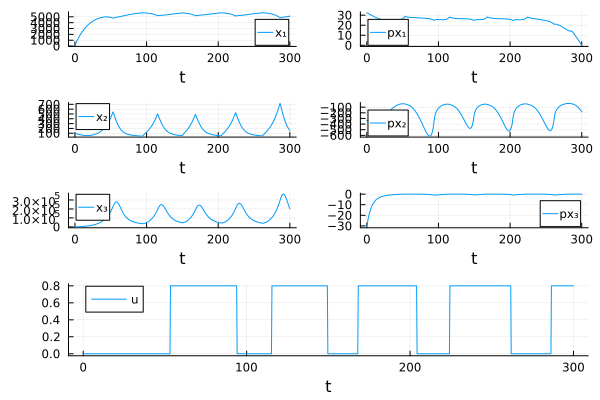

In [114]:
plot(sol_new4)